# Introduction to Machine Learning with `scikit-learn`

- `scikit-learn` is the most popular **Python** library for machine learning. It has a very comprehensive documentation in the [``scikit-learn``](https://scikit-learn.org) website

><img src="images/scikitlearn.png" width="200" style="margin: 20px auto;">


### Supervised and Unsupervised learning

<img src="images/sup_unsup_diag.png" width="70%" style="margin: 20px auto;">

Not included here: **Reinforcement Learning** and **Recommender Systems**

### Supervised Learning

The dataset used to train a model should have observations , features and response or a target. Then the model is trained to be able to ``predict`` the desired output of an unseen object given the set of features. 

In supervised learning, there is always a distinction between a **training set** for which the desired outcome is given, and a **test set** for which the desired outcome needs to be inferred. The goal of this model is to generalize a dataset so that the general rule can be applied to the new data.


### Unsupervised Learning

Unsupervised learning is applied to datasets that do not have a specific response or the outcome. Datasets like, images, a collection of news articles, sound sources, etc. Unsupervised learning models are used to identify and visualize patterns in data by grouping similar types based on their given features. The goal of the model is to **represent** data in a way that meaningful information can be extracted.

Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.

## Data structure in ``scikit-learn``
Most ML algorithms in scikit-learn expects the data to be stored as a two-dimensional array, of shape **n_samples** and **n_features**. But, for high dimensional arrays, like, millions of features with a lot of zeros in them, then it may be converted to ``scipy.sparse`` matrices of the same shape, for memory efficiency.



- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

### Demo example: the ``iris`` dataset

In [1]:
# we import a toy dataset in scikit learn; already structured as an ndarray
import numpy as np 
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
#this iris dataset included in scikit learn is already preprocessed and saved as a bunch or dict like file
type(iris)


sklearn.utils.Bunch

In [4]:
# iris

In [5]:
#converting sklearn "bunch" iris dataset to pandas data frame
import pandas as pd
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris['target'] = iris['target']
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
print(df_iris.shape)

(150, 5)


In [7]:
# iris.DESCR

In [8]:
n_samples, n_features = iris.data.shape
print('No. of samples:', n_samples) # no. of rows
print('No. of features:', n_features) # no. of columns in the independent variables

No. of samples: 150
No. of features: 4


In [9]:
# print(iris['filename'])
print(iris.keys())
print(iris['feature_names'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Supervised Learning

#### split data for ``train`` and ``test`` sets

<img src="images/train_test_split.png" width="60%" style="margin: 20px;">

<img src="images/train_test_matrix.png" width="50%" style="margin: 20px;">

### ``train_test_split`` on a numpy array

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(12).reshape((6, 2)), range(6)

In [11]:
print(X)
np.array(y)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


array([0, 1, 2, 3, 4, 5])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [13]:
print(X_train)
print(y_train)

[[ 8  9]
 [ 0  1]
 [ 4  5]
 [10 11]]
[4, 0, 2, 5]


In [14]:
print(X_test)
print(y_test)

[[2 3]
 [6 7]]
[1, 3]


In [15]:
print(np.bincount(iris.target))
print(iris['target_names']) # the target classes to predict

[50 50 50]
['setosa' 'versicolor' 'virginica']


In [16]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### apply ``sklearn.model_selection`` import ``train_test_split`` on the ```iris``` dataset

In [57]:
from sklearn.model_selection import train_test_split
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [58]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [62]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('y_train:', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('y_test:', np.bincount(y_test) / float(len(y_test)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
y_train: [33.33333333 33.33333333 33.33333333]
y_test: [33.33333333 33.33333333 33.33333333]


### ``stratify`` to have a balanced sample of the split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=123,
                                                    stratify = y)
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('y_train:', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('y_test:', np.bincount(y_test) / float(len(y_test)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
y_train: [33.33333333 33.33333333 33.33333333]
y_test: [33.33333333 33.33333333 33.33333333]


In [53]:
print(X_train.shape)
print(X_test.shape)

(22, 2)
(16, 2)


In [46]:
print(y_train.shape)
print(y_test.shape)

(22,)
(16,)


In [37]:
# iris.values()

In [24]:
# iris

In [39]:
# print(iris.data[0, :])
print(iris.data.shape)
print(iris.target)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### ``predict`` using the KNN model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier().fit(X_train, y_train)
pred_y = classifier.predict(X_test)

print("Fraction Correct Accuracy:")
print(np.sum(pred_y == y_test) / float(len(y_test)))

Fraction Correct Accuracy:
0.95


In [27]:
y_test.shape

(60,)

### Basic structure of  ``scikit-learn`` Estimators
Example: the Linear regression model


><img src="images/linear_reg2.png" width="70%" style="margin: 50px;">

### Other estimator class samples 


```python
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
y_pred = model.fit(X_train, y_train).predict(X_test)
```



```python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10)
y_pred = model.fit(X_train, y_train).predict(X_test)
```

```python
model = LogisticRegression(C=10)
y_pred = model.fit(X_train_2, y_train).predict(X_test_2)
```

### sample of a ``transformer``
```python
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
X_train_2 = trans.fit(X_train).transform(X_train)
X_test_2 = trans.transform(X_test)
```

## Below are exmaples of fitting various models into the ``iris`` dataset

>### Decision tree classifier

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from IPython.display import Image, display
# import graphviz as gv

In [29]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [30]:
clf = tree.DecisionTreeClassifier()
iris = load_iris()

In [31]:
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')  

In [32]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('iris')


'iris.pdf'

In [63]:
!open iris.pdf

>### Support vector machines - ``sklearn.svm.SVC`` or ``sklearn.svm.SVR``
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

>Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

In [34]:
# SVC example on iris data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape
((150, 4), (150,))

((150, 4), (150,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=123)
X_train.shape, y_train.shape
((90, 4), (90,))
X_test.shape, y_test.shape
((60, 4), (60,))
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)                           

0.9666666666666667

## Unsupervised Learning

>### Example: Principal component analysis (PCA)

>Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

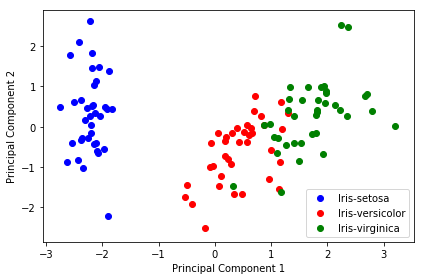

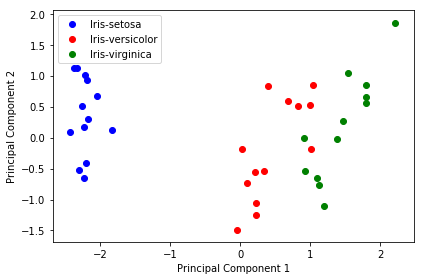

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # 
 
"""Standardize features by removing the mean and scaling to unit variance"""
"""Centering and scaling happen independently on each feature by computing 
the relevant statistics on the samples in the training set. Mean and standard deviation
are then stored to be used on later data using the transform method"""

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0,
                                                    stratify=iris.target)

sc = StandardScaler()
sc.fit(X_train)
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(sc.transform(X_train))
X_test_pca = pca.transform(sc.transform(X_test))

for X, y in zip((X_train_pca, X_test_pca), (y_train, y_test)):

    for i, annot in enumerate(zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                                  ('blue', 'red', 'green'))):
        plt.scatter(X[y==i, 0],
                    X[y==i, 1],
                    label=annot[0],
                    c=annot[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()



## The End 